# Hackaton LogView360 2025

1. Carlos Gongora
2. Santiago Aldana
3. Daniela Hernandez

# Montamos en el drive los archivos

In [224]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importamos las librerias necesarias

In [226]:
import pandas as pd
import re
import csv

# Modulo 1: Preprocesamiento de logs
## 1.1. Convertir los tres formatos en una estructura homogenea

En este apartado se convirtieron todos los datos seleccionados en un mismo formato, que en este caso es .csv. Previamente con la ayuda de Exel se transformo el archivo __logs_SecuCheck.json__

Ahora aca transformamos el archivo __logs_CoreBank.log__ en un .csv con ayuda del siguiente script que crea una expresion regular y procesa el archivo.

In [230]:

from google.colab import drive


# Rutas
input_path = "/content/drive/MyDrive/Hackaton LogView 2025/logs_CoreBank.log"
output_path = "/content/drive/MyDrive/Hackaton LogView 2025/logs_CoreBank.csv"

# Expresión regular
pattern = re.compile(
    r"(?P<fecha>\d{4}-\d{2}-\d{2}) (?P<hora>\d{2}:\d{2}:\d{2}) INFO \[(?P<origen>\w+)\] (?P<usuario>\w+)@(?P<ip>[\d\.]+) Transacción ejecutada \(transaction: (?P<transaccion>\w+-\d+), tipo: (?P<tipo>\w+), cuenta: (?P<cuenta>\w+), estado: (?P<estado>\w+), valor: (?P<valor>[\d\.]+)\)"
)

# Procesar archivo
with open(input_path, "r", encoding="utf-8") as infile, open(output_path, "w", newline="", encoding="utf-8") as outfile:
    writer = csv.writer(outfile)
    writer.writerow(["date_core", "time_core", "nivel_log", "origen", "user_id", "ip_address", "transaction_id", "tipo", "cuenta", "estado", "valor"])

    for line in infile:
        match = pattern.search(line)
        if match:
            writer.writerow([
                match.group("fecha"),
                match.group("hora"),
                "INFO",
                match.group("origen"),
                match.group("usuario"),
                match.group("ip"),
                match.group("transaccion"),
                match.group("tipo"),
                match.group("cuenta"),
                match.group("estado"),
                match.group("valor")
            ])

## Mostramos los datos
### Tabla de logs_CoreBank

In [231]:
# Ruta al archivo CSV generado
csv_path = "/content/drive/MyDrive/Hackaton LogView 2025/logs_CoreBank.csv"

# Leer con pandas
lcb = pd.read_csv(csv_path)

# Mostrar las primeras filas
lcb.head()

,date_core,time_core,nivel_log,origen,user_id,ip_address,transaction_id,tipo,cuenta,estado,valor
0,2025-05-13,08:00:10,INFO,mobile,user65,198.81.20.19,txn-0000,consignar,ahorros,Completada,429947.36
1,2025-05-13,08:00:11,INFO,mobile,user94,92.100.49.61,txn-0001,retirar,ahorros,Completada,1466275.85
2,2025-05-13,08:00:12,INFO,mobile,user93,35.10.214.169,txn-0002,transferir,ahorros,Completada,3764977.62
3,2025-05-13,08:00:13,INFO,api,user39,155.165.170.170,txn-0003,transferir,corriente,Completada,4780695.73
4,2025-05-13,08:00:14,INFO,mobile,user88,137.102.49.12,txn-0004,transferir,ahorros,Completada,3808884.49


### Tabla de SecuCheck.csv

In [232]:
# Ruta al archivo CSV
csv_path = "/content/drive/MyDrive/Hackaton LogView 2025/logs_SecuCheck.csv"

# Leer con pandas
lsc = pd.read_csv(csv_path, encoding='latin-1')

# Mostrar las primeras filas
lsc.head()

,date_secu,time_secu,transaction_id,user_id,ip_address,resultado_validación,motivo_fallo,modulo,verificaciones_realizadas
0,13/05/2025,08:00:00 a. m.,txn-0000,user65,198.81.20.19,Aprobada,NaN,mobile,frecuencia
1,13/05/2025,08:00:01 a. m.,txn-0001,user94,92.100.49.61,Aprobada,NaN,mobile,"token,frecuencia,geolocalización"
2,13/05/2025,08:00:02 a. m.,txn-0002,user93,35.10.214.169,Aprobada,NaN,mobile,"geolocalización,token,blacklist"
3,13/05/2025,08:00:03 a. m.,txn-0003,user39,155.165.170.170,Aprobada,NaN,api,"blacklist,geolocalización,frecuencia"
4,13/05/2025,08:00:04 a. m.,txn-0004,user88,137.102.49.12,Aprobada,NaN,mobile,geolocalización


### Tabla de logs_MidFlow_ES

In [233]:
# Ruta al archivo CSV
csv_path = "/content/drive/MyDrive/Hackaton LogView 2025/logs_MidFlow_ESB.csv"

# Leer con pandas
lmf = pd.read_csv(csv_path)

# Mostrar las primeras filas
lmf.head()

,date_mid,time_mid,nivel_log,transaction_id,direction,operation,status_code,latency_ms,user_id,ip_address,modulo
0,13/05/2025,08:00:05 a. m.,INFO,txn-0000,request,consignar,200,NaN,user65,198.81.20.19,mobile
1,13/05/2025,08:00:06 a. m.,INFO,txn-0000,response,consignar,200,272.0,user65,198.81.20.19,mobile
2,13/05/2025,08:00:06 a. m.,INFO,txn-0001,request,retirar,200,NaN,user94,92.100.49.61,mobile
3,13/05/2025,08:00:07 a. m.,INFO,txn-0001,response,retirar,200,143.0,user94,92.100.49.61,mobile
4,13/05/2025,08:00:07 a. m.,INFO,txn-0002,request,transferir,200,NaN,user93,35.10.214.169,mobile


## 1.2. Unificar por transaction_id, manteniendo trazabilidad por timestamp.
Esta tabla fue previamente unificada y estandarizada usando el software de Excel

In [236]:
# Ruta al archivo CSV
csv_path = "/content/drive/MyDrive/Hackaton LogView 2025/Unificado_Limpio.csv"

# Limpieza de nombres
unl = pd.read_csv(csv_path, encoding='latin-1')
unl.columns = unl.columns.str.replace(r'^Tabla4\.', '', regex=True)
unl.columns = unl.columns.str.replace(r'^Tabla6\.', '', regex=True)

# Mostrar las primeras filas
unl.head()


,date_secu,time_secu,transaction_id,user_id,ip_address,resultado_validación,motivo_fallo,modulo,verificaciones_realizadas,date_mid,...,nivel_log,direction,operation,status_code,latency_ms,date_core,time_core,cuenta,estado,valor
0,13/05/2025,08:00:00 a. m.,txn-0000,user65,198.81.20.19,Aprobada,NaN,mobile,frecuencia,13/05/2025,...,INFO,request,consignar,200.0,NaN,13/05/2025,08:00:10 a. m.,ahorros,Completada,429947.36
1,13/05/2025,08:00:00 a. m.,txn-0000,user65,198.81.20.19,Aprobada,NaN,mobile,frecuencia,13/05/2025,...,INFO,response,consignar,200.0,272.0,13/05/2025,08:00:10 a. m.,ahorros,Completada,429947.36
2,13/05/2025,08:00:01 a. m.,txn-0001,user94,92.100.49.61,Aprobada,NaN,mobile,"token,frecuencia,geolocalización",13/05/2025,...,INFO,request,retirar,200.0,NaN,13/05/2025,08:00:11 a. m.,ahorros,Completada,1466275.85
3,13/05/2025,08:00:01 a. m.,txn-0001,user94,92.100.49.61,Aprobada,NaN,mobile,"token,frecuencia,geolocalización",13/05/2025,...,INFO,response,retirar,200.0,143.0,13/05/2025,08:00:11 a. m.,ahorros,Completada,1466275.85
4,13/05/2025,08:00:02 a. m.,txn-0002,user93,35.10.214.169,Aprobada,NaN,mobile,"geolocalización,token,blacklist",13/05/2025,...,INFO,request,transferir,200.0,NaN,13/05/2025,08:00:12 a. m.,ahorros,Completada,3764977.62


## 1.3. Estandarizar campos como estados, usuarios, IPs, etc.

# Módulo 2: Visualización


## 2.1. Mapa de flujo de cada transacción por sistema.

Se realiza un programa el cuál lee el archivo .csv ya limpio y unificado para crear diagramas dirigidos, es decir, los mapas de flujo; y Si la transacción pasó por SecuCheck, se crea un nodo con el resultado de validación y el motivo del fallo (si fue rechazada). Si existen datos en los demás módulos, sistemas se dibujan flechas que conectan los nodos hasta donde haya llegado la transacción.

In [237]:
import pandas as pd
import graphviz
import os

# Cargar el archivo
#df = pd.read_csv("Unificado_Limpio.csv", encoding='latin1')

# Crear carpeta para los diagramas
os.makedirs("diagramas_transacciones", exist_ok=True)

# Obtener todos los transaction_id únicos
all_ids = unl['transaction_id'].unique()

for tx_id in all_ids:
    row = unl[unl['transaction_id'] == tx_id].iloc[0]
    dot = graphviz.Digraph(comment=f"Transacción {tx_id}")

    # Estilo global del gráfico (corregido)
    dot.attr('graph',
             label=f'Transacción {tx_id}',
             labelloc='t',
             fontsize='20',
             fontname='Arial',
             fontcolor='#0960AE',
             bgcolor='white')

    # Estilo de los nodos
    dot.attr('node', fontname='Arial', fontcolor='white', style='filled,rounded', shape='box')

    # Nodo: SecuCheck
    if pd.notna(row['resultado_validación']):
        text = f"SecuCheck\nResultado: {row['resultado_validación']}"
        if row['resultado_validación'] == 'Rechazada' and pd.notna(row['motivo_fallo']):
            text += f"\nMotivo: {row['motivo_fallo']}"
        dot.node('SecuCheck', text, fillcolor='#64A6E3')

    # Nodo: ESB
    if pd.notna(row['operation']):
        text = "ESB"
        if pd.notna(row['operation']):
            text += f"\nOp: {row['operation']}"
        if pd.notna(row['status_code']):
            text += f"\nStatus: {int(row['status_code'])}"
        if pd.notna(row['latency_ms']):
            text += f"\nLatencia: {int(row['latency_ms'])} ms"
        dot.node('ESB', text, fillcolor='#3E8FD8')

    # Nodo: CoreBank
    if pd.notna(row['estado']):
        text = f"CoreBank\nCuenta: {row['cuenta']}\nEstado: {row['estado']}\nValor: {row['valor']}"
        dot.node('CoreBank', text, fillcolor='#0960AE')

    # Conexiones con flechas color azul claro
    edge_style = {'color': '#B8D1E7'}
    if pd.notna(row['resultado_validación']) and pd.notna(row['operation']):
        dot.edge('SecuCheck', 'ESB', **edge_style)
    if pd.notna(row['operation']) and pd.notna(row['estado']):
        dot.edge('ESB', 'CoreBank', **edge_style)

    # Guardar diagrama
    output_path = os.path.join("diagramas_transacciones", f"transaccion_{tx_id}")
    dot.render(output_path, format='png', cleanup=True)

print("Diagramas generados exitosamente con estilo actualizado.")


KeyboardInterrupt: 

Aca en la ruta del sistema nos genera todos los diagramas de las transacciones

## 2.2. Tiempos de latencia por etapa.

### Tiempo entre SecuCheck y MidFlow_ESB

In [240]:
# Combinar y convertir a datetime
unl['datetime_secu'] = pd.to_datetime(unl['date_secu'] + ' ' + unl['time_secu'], dayfirst=True)
unl['datetime_mid'] = pd.to_datetime(unl['date_mid'] + ' ' + unl['time_mid'], dayfirst=True)

# Calcular diferencia en segundos entre secu y mid
unl['tiempo_total_segundos'] = (unl['datetime_mid'] - unl['datetime_secu']).dt.total_seconds()

unl['latency_sec'] = unl['latency_ms'] / 1000


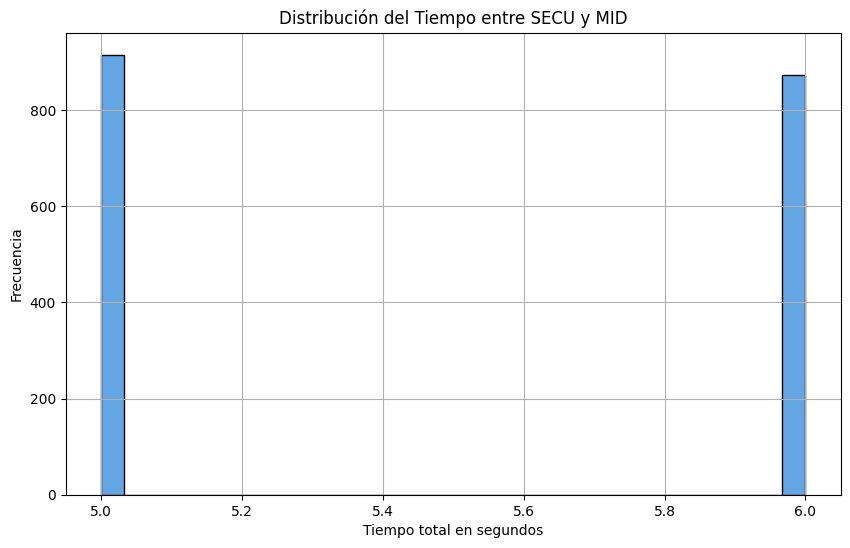

In [241]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(unl['tiempo_total_segundos'], bins=30, color='#64A6E3', edgecolor='black')

plt.title('Distribución del Tiempo entre SECU y MID')
plt.xlabel('Tiempo total en segundos')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

A partir del análisis de los datos, se observa que el tiempo de latencia entre el inicio del módulo SecuCheck y el inicio del módulo ESB se encuentra predominantemente en el rango de 5 a 6 segundos. Esta distribución sugiere una consistencia en el comportamiento del sistema, indicando que el proceso de transición entre ambos módulos mantiene una latencia relativamente estable dentro de ese intervalo.

### Tiempo entre MidFlow y CoreBank

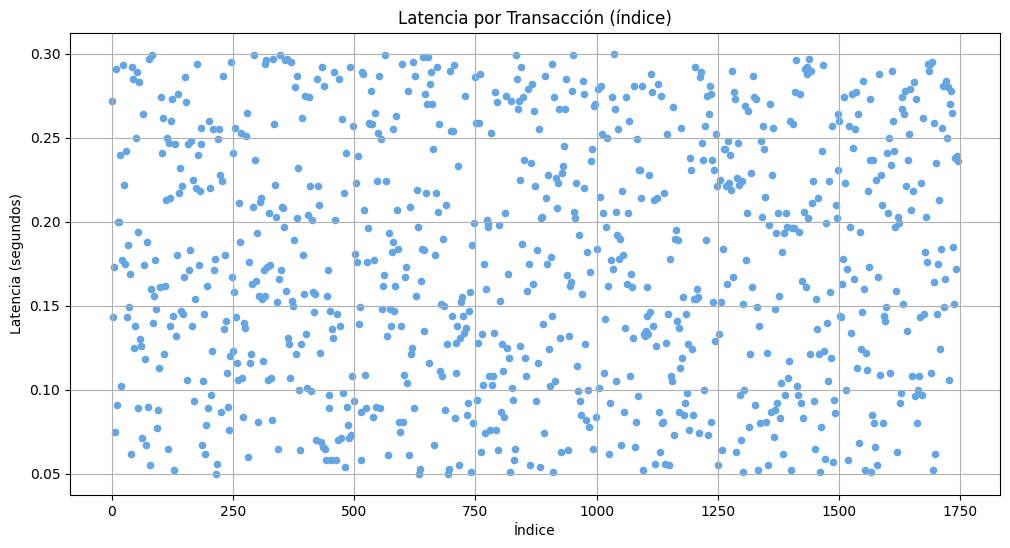

In [242]:
import matplotlib.pyplot as plt
import pandas as pd

# 1. Filtrar filas que tienen latencia válida
latency_data = unl.dropna(subset=['latency_sec'])

# 2. Graficar latencias ordenadas
latency_data = unl.dropna(subset=['latency_sec'])

plt.figure(figsize=(12, 6))
plt.scatter(latency_data.index, latency_data['latency_sec'], color='#64A6E3', s=20)

plt.title('Latencia por Transacción (índice)')
plt.xlabel('Índice')
plt.ylabel('Latencia (segundos)')
plt.grid(True)
plt.show()

El gráfico de dispersión de latencia por transacción permite visualizar el comportamiento individual de cada transacción en términos de tiempo de respuesta. Se observa que la mayoría de las latencias se encuentran dentro de un rango estable, lo que sugiere un rendimiento consistente del sistema

### Tiempo total de una ejecucion total

In [244]:
# Combinar y convertir a datetime
unl['datetime_secu'] = pd.to_datetime(unl['date_secu'] + ' ' + unl['time_secu'], dayfirst=True)
unl['datetime_mid'] = pd.to_datetime(unl['date_mid'] + ' ' + unl['time_mid'], dayfirst=True)

# Calcular diferencia en segundos
unl['diff_sec_secu_mid'] = (unl['datetime_mid'] - unl['datetime_secu']).dt.total_seconds()

# Convertir latency_ms a segundos
unl['latency_sec'] = unl['latency_ms'] / 1000

# Sumar la latencia a la diferencia
unl['tiempo_total_segundos'] = unl['diff_sec_secu_mid'] + unl['latency_sec']

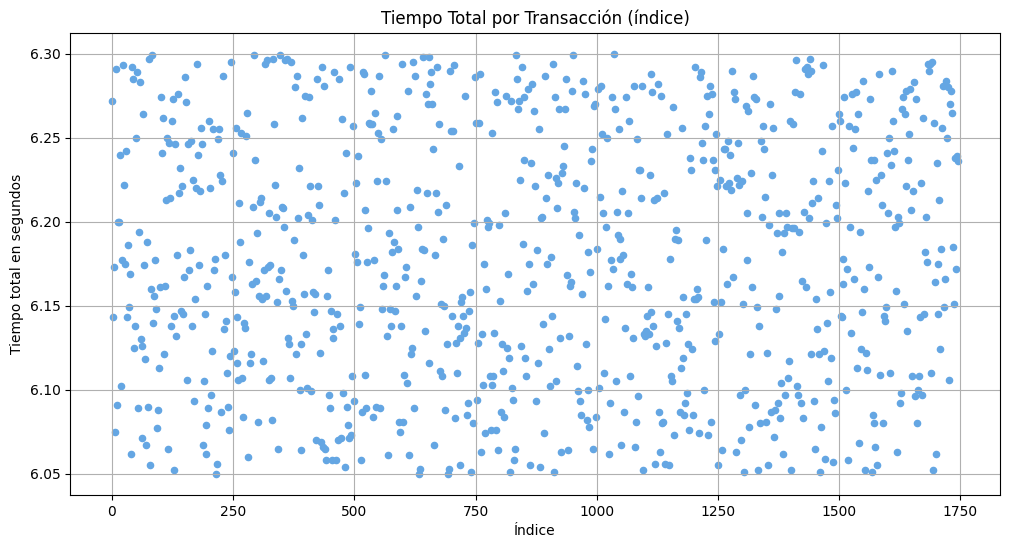

In [245]:
plt.figure(figsize=(12, 6))
plt.scatter(unl.index, unl['tiempo_total_segundos'], color='#64A6E3', s=20)

plt.title('Tiempo Total por Transacción (índice)')
plt.xlabel('Índice')
plt.ylabel('Tiempo total en segundos')
plt.grid(True)
plt.show()

El sistema muestra un rendimiento muy estable, con tiempos de respuesta concentrados entre 6.05 y 6.30 segundos y sin anomalías evidentes. No se observan tendencias ni fluctuaciones extremas, lo que indica un comportamiento predecible y consistente en más de 1750 transacciones.

## 2.3. Resultados de validación vs ejecución real.


In [246]:
# Filtrar solo transacciones que fueron Aprobadas o Rechazadas
validaciones = unl[unl['resultado_validación'].isin(['Aprobada', 'Rechazada'])]

# Contar cuántas fueron Completadas dentro de cada grupo de resultado_validación
completadas = validaciones[validaciones['estado'] == 'Completada']['resultado_validación'].value_counts()

# Contar el total por tipo (Aprobada y Rechazada)
totales = validaciones['resultado_validación'].value_counts()

# Combinar ambos conteos en un DataFrame
comparacion = pd.DataFrame({
    'Total': totales,
    'Completadas': completadas
}).fillna(0)

# Asegurar que sean enteros
comparacion = comparacion.astype(int)

print(comparacion)

                      Total  Completadas
resultado_validación                    
Aprobada               1788         1746
Rechazada                85            0


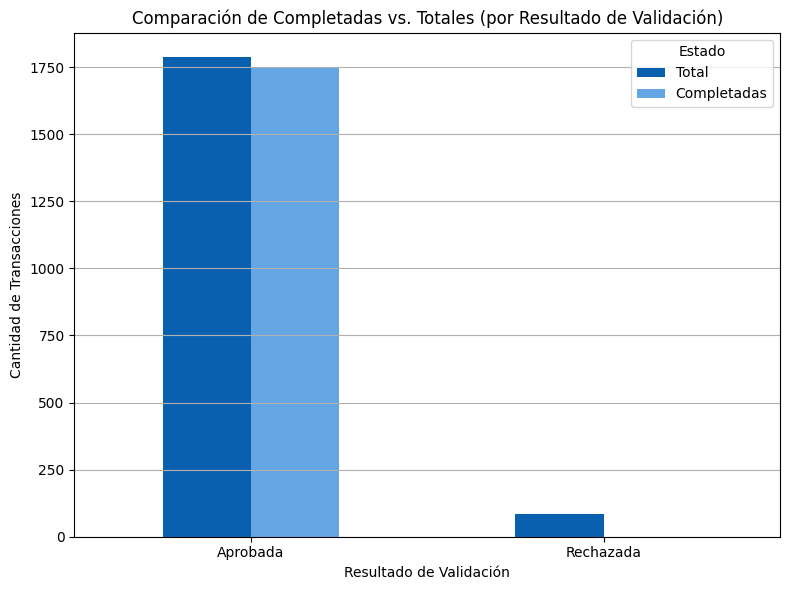

In [247]:
# Graficar comparación
comparacion.plot(kind='bar', figsize=(8, 6), color=['#0960ae', '#64a6e3'])

plt.title('Comparación de Completadas vs. Totales (por Resultado de Validación)')
plt.xlabel('Resultado de Validación')
plt.ylabel('Cantidad de Transacciones')
plt.xticks(rotation=0)
plt.legend(title='Estado')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

La gráfica muestra cómo las transacciones con estado "Completada" se distribuyen frente al total de transacciones Aprobadas y Rechazadas. Se observa que la mayoría de las Aprobadas llegan a completarse exitosamente, lo que refleja un flujo efectivo del proceso para los casos válidos. En contraste, las transacciones Rechazadas casi nunca alcanzan un estado de completado, lo cual es esperable dado que fallan en alguna etapa del proceso de validación. Esto evidencia que el sistema está funcionando correctamente al bloquear intentos inválidos y permitiendo solo transacciones seguras.

## 2.4. Transacciones rechazadas o fallidas y sus causas.

### Trasacciones Rechazadas y aprovadas

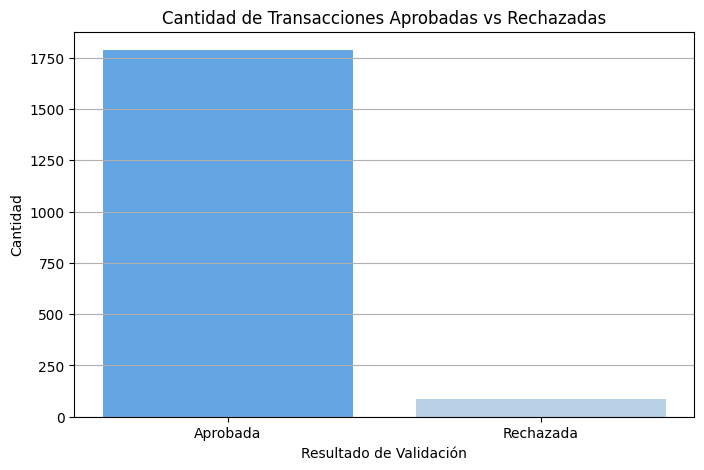

In [248]:
# Contar cantidad de transacciones por resultado de validación
conteo_resultados = unl['resultado_validación'].value_counts()

# Graficar
plt.figure(figsize=(8, 5))
plt.bar(conteo_resultados.index, conteo_resultados.values, color=['#64a6e3', '#b8d1e7'])  # verde y rojo

plt.title('Cantidad de Transacciones Aprobadas vs Rechazadas')
plt.xlabel('Resultado de Validación')
plt.ylabel('Cantidad')
plt.grid(axis='y')
plt.show()

Esta gráfica muestra una distribución muy desbalanceada con aproximadamente 1,750 transacciones aprobadas versus solo menos 100 rechazadas, representando una tasa de aprobación del 95%. El sistema demuestra un rendimiento excelente al procesar correctamente la gran mayoría de transacciones, mientras que el bajo número de rechazos sugiere que los criterios de validación están bien ajustados y los usuarios/sistemas que envían las transacciones generalmente cumplen con los requisitos establecidos.

Motivos de fallo más comunes:
motivo_fallo
IP sospechosa             31
Límite diario excedido    30
Token inválido            24
Name: count, dtype: int64


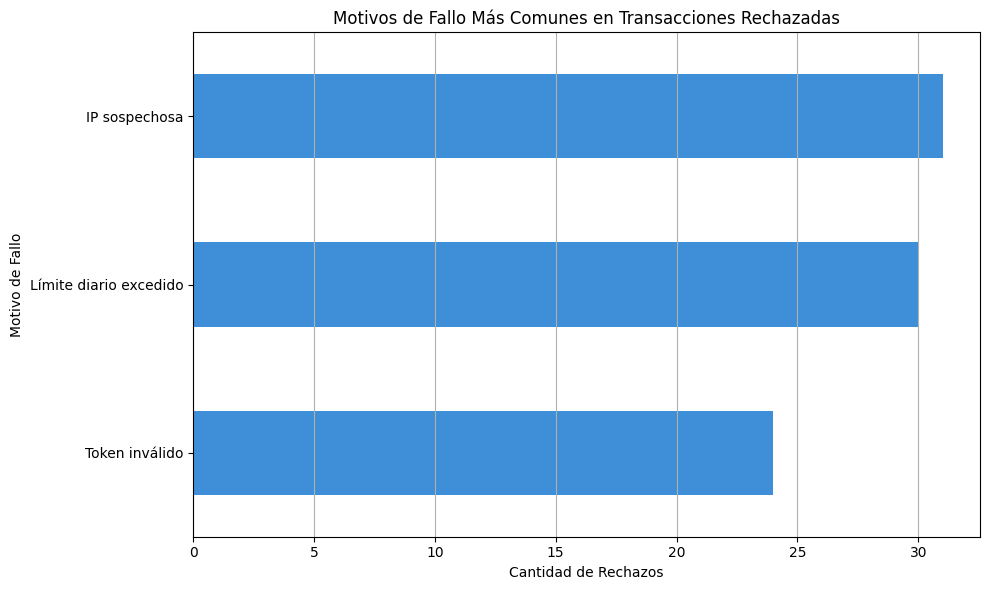

In [250]:
# Filtrar solo las transacciones rechazadas
rechazadas = unl[unl['resultado_validación'] == 'Rechazada']

# Contar los motivos de fallo
motivos = rechazadas['motivo_fallo'].value_counts()

# Mostrar en tabla
print("Motivos de fallo más comunes:")
print(motivos)

# Graficar
plt.figure(figsize=(10, 6))
motivos.plot(kind='barh', color='#3e8fd8')  # Gráfico de barras horizontales

plt.title('Motivos de Fallo Más Comunes en Transacciones Rechazadas')
plt.xlabel('Cantidad de Rechazos')
plt.ylabel('Motivo de Fallo')
plt.gca().invert_yaxis()  # Motivo más frecuente arriba
plt.grid(axis='x')
plt.tight_layout()
plt.show()

El análisis de los motivos de fallo revela que los errores más comunes están relacionados con "IP Sospechosa", seguido por "Límite diario excedido" y "Token Invalido". Esto indica que gran parte de los rechazos provienen de problemas de autenticación o intentos sospechosos desde ubicaciones no confiables. Estos hallazgos pueden ser útiles para fortalecer las reglas de seguridad, como mejorar la validación de tokens o implementar filtros más rigurosos por geolocalización o frecuencia de intentos.









### Cantidad de Peticiones por Módulo

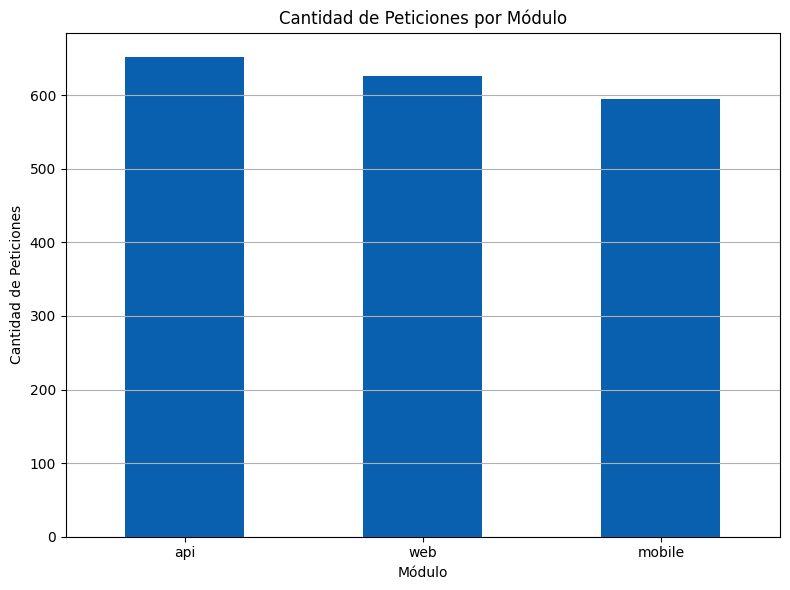

In [251]:
# Contar cantidad de transacciones por módulo
modulos = unl['modulo'].value_counts()

# Graficar
plt.figure(figsize=(8, 6))
modulos.plot(kind='bar', color='#0960ae')

plt.title('Cantidad de Peticiones por Módulo')
plt.xlabel('Módulo')
plt.ylabel('Cantidad de Peticiones')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

La mayoría de las peticiones se realizan desde el módulo "api", seguido por "web" y en menor proporción por "mobile". Esto sugiere que los usuarios interactúan principalmente a través de apis externas, lo cual podría reflejar una tendencia hacia el uso del sistema. Este comportamiento puede orientar decisiones futuras sobre dónde enfocar optimizaciones, pruebas y medidas de seguridad.

### Cantidad de Operaciones Realizadas

Cantidad de operaciones:
operation
consignar     648
transferir    594
retirar       546
Name: count, dtype: int64


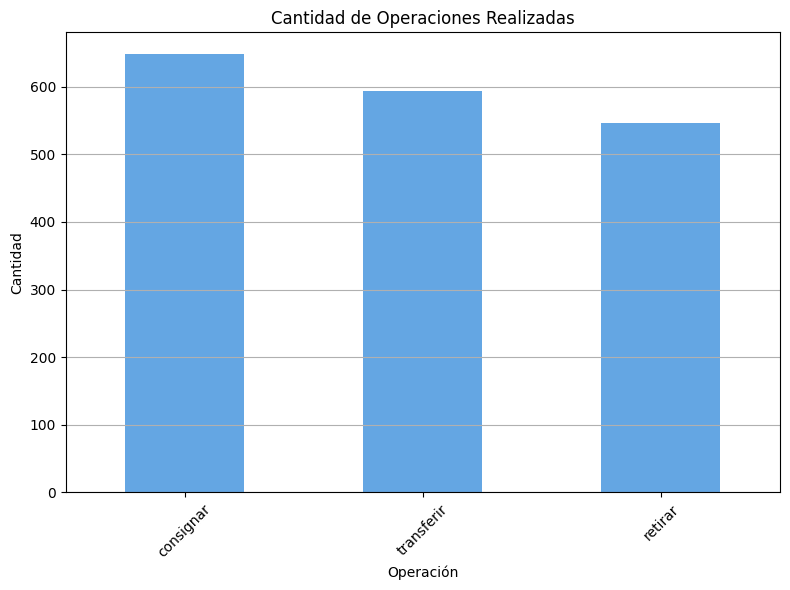

In [252]:
# Contar las operaciones más frecuentes
operaciones = unl['operation'].value_counts()

# Mostrar en tabla
print("Cantidad de operaciones:")
print(operaciones)

# Graficar
plt.figure(figsize=(8, 6))
operaciones.plot(kind='bar', color='#64a6e3')

plt.title('Cantidad de Operaciones Realizadas')
plt.xlabel('Operación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Esta gráfica, "Cantidad de Operaciones Realizadas", muestra las frecuencias de tres tipos de operaciones bancarias: "consignar", "transferir" y "retirar". La operación de "consignar" es la más frecuente, con más de 650 operaciones. Le sigue "transferir", con casi 600, y finalmente "retirar", con aproximadamente 550 operaciones. Esto indica que las consignaciones son las transacciones más comunes, aunque los otros dos tipos de operaciones también tienen una presencia significativa.

## 2.5. Identificacion de transacciones que no deberian estar en los logs

In [253]:
# Filtrar registros con ERROR
aprobados_con_error = unl[(unl['nivel_log'] == 'ERROR') & (unl['estado'] == 'Completada')]

# Contar cuántos hay
cantidad = len(aprobados_con_error)
print(f"Total de ERRORES que fueron Aprovados: {cantidad}")

Total de ERRORES que fueron Aprovados: 0


# Modulo 3

### 3.1. Transacciones Aprovadas en SecuCheck pero no ejecutadas

In [254]:
# Filtrar registros aprobados con ERROR
aprobados_con_error = unl[(unl['resultado_validación'] == 'Aprobada') & (unl['nivel_log'] == 'ERROR')]

# Contar cuántos hay
cantidad = len(aprobados_con_error)
print(f"Total de registros aprobados con ERROR: {cantidad}")

Total de registros aprobados con ERROR: 42


Total de registros aprobados con ERROR: 42


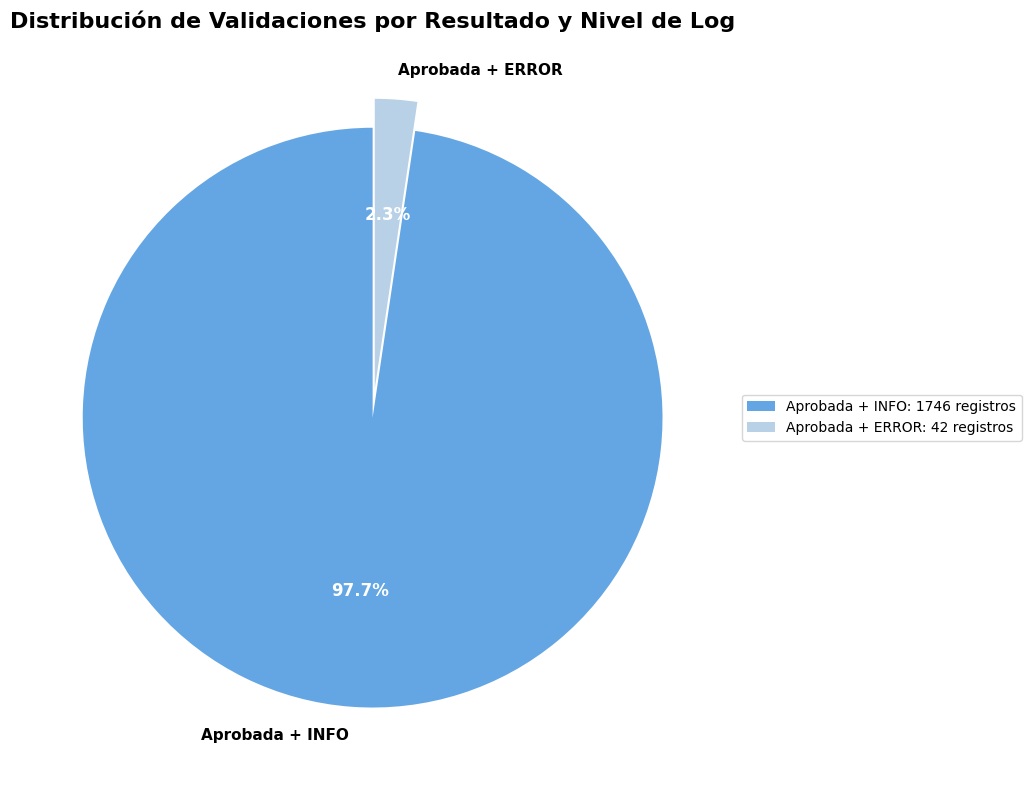

In [255]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar registros aprobados con ERROR
aprobados_con_error = unl[(unl['resultado_validación'] == 'Aprobada') & (unl['nivel_log'] == 'ERROR')]

# Contar cuántos hay
cantidad_aprobados_error = len(aprobados_con_error)
print(f"Total de registros aprobados con ERROR: {cantidad_aprobados_error}")

# Crear categorías para la gráfica de pie
# Contar todas las combinaciones posibles
aprobados_info = len(unl[(unl['resultado_validación'] == 'Aprobada') & (unl['nivel_log'] == 'INFO')])
rechazados_error = len(unl[(unl['resultado_validación'] == 'Rechazada') & (unl['nivel_log'] == 'ERROR')])
rechazados_info = len(unl[(unl['resultado_validación'] == 'Rechazada') & (unl['nivel_log'] == 'INFO')])

# Datos para la gráfica
categorias = ['Aprobada + INFO', 'Aprobada + ERROR', 'Rechazada + INFO', 'Rechazada + ERROR']
valores = [aprobados_info, cantidad_aprobados_error, rechazados_info, rechazados_error]

# Filtrar categorías con valores > 0 para que la gráfica sea más limpia
categorias_filtradas = []
valores_filtrados = []
for i, valor in enumerate(valores):
    if valor > 0:
        categorias_filtradas.append(categorias[i])
        valores_filtrados.append(valor)

# Crear la gráfica de pie
plt.figure(figsize=(10, 8))

# Colores personalizados
colores = ['#64a6e3', '#b8d1e7', '#f39c12', '#9b59b6'][:len(valores_filtrados)]

# Crear el pie chart
wedges, texts, autotexts = plt.pie(valores_filtrados,
                                   labels=categorias_filtradas,
                                   autopct='%1.1f%%',
                                   startangle=90,
                                   colors=colores,
                                   explode=[0.1 if 'ERROR' in cat else 0 for cat in categorias_filtradas])  # Resaltar los errores

# Personalizar el texto
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight('bold')
    autotext.set_fontsize(12)

for text in texts:
    text.set_fontsize(11)
    text.set_weight('bold')

# Título y configuración
plt.title('Distribución de Validaciones por Resultado y Nivel de Log',
          fontsize=16, fontweight='bold', pad=20)

# Agregar una leyenda con los números exactos
legend_labels = [f'{cat}: {val} registros' for cat, val in zip(categorias_filtradas, valores_filtrados)]
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

# Ajustar el layout
plt.tight_layout()

# Mostrar la gráfica
plt.show()


La gran mayoría de las validaciones aprobadas (el 97.7%) están asociadas con logs de nivel INFO, mientras que solo el 2.3% presentan nivel ERROR. Esto indica que el sistema funciona correctamente en casi todos los casos, y los errores en validaciones aprobadas son poco frecuentes y podrían estar relacionados con situaciones atípicas o no críticas.

## 3.2. Transacciones duplicadas o con latencias anormales

### Transacacciones Duplicadas

In [256]:
# Contar las ocurrencias de cada transaction_id
conteo_transacciones = unl['transaction_id'].value_counts()

# Filtrar los que aparecen más de 3 veces
ids_mas_de_3 = conteo_transacciones[conteo_transacciones > 3]

print("Transaction IDs con más de 3 registros:")
print(ids_mas_de_3)

# Si quieres ver todos los registros completos de esos IDs
registros_completos = unl[unl['transaction_id'].isin(ids_mas_de_3.index)]
print("\nRegistros completos:")
print(registros_completos)

Transaction IDs con más de 3 registros:
Series([], Name: count, dtype: int64)

Registros completos:
Empty DataFrame
Columns: [date_secu, time_secu, transaction_id, user_id, ip_address, resultado_validación, motivo_fallo, modulo, verificaciones_realizadas, date_mid, time_mid, nivel_log, direction, operation, status_code, latency_ms, date_core, time_core, cuenta, estado, valor, datetime_secu, datetime_mid, tiempo_total_segundos, latency_sec, diff_sec_secu_mid]
Index: []

[0 rows x 26 columns]


Durante el análisis se evaluó la cantidad de registros asociados a cada transaction_id con el objetivo de identificar posibles duplicidades o casos en los que una transacción apareciera registrada múltiples veces a lo largo del flujo (por ejemplo, por reintentos, errores o desincronización entre módulos).
El resultado mostró que no existen transaction_id con más de tres registros asociados, y de hecho, no se encontró ningún caso con más de un registro relevante que sugiera comportamiento irregular. Esto indica que no hay evidencia de transacciones repetidas o con múltiples pasos intermedios que no hayan sido correctamente gestionados. En resumen, no se detectaron transacciones duplicadas ni con trazas excesivas.


### Latencias Anormales

In [257]:
import pandas as pd
import numpy as np

# Calcular promedio excluyendo valores NaN
promedio_tiempo = unl['tiempo_total_segundos'].mean()

# Información adicional útil
total_registros = len(unl['tiempo_total_segundos'])
registros_validos = unl['tiempo_total_segundos'].count()  # Cuenta solo los no-NaN
registros_nan = total_registros - registros_validos

print("="*50)
print("ANÁLISIS DE TIEMPOS")
print("="*50)
print(f"Promedio de tiempo: {promedio_tiempo:.3f} segundos")
print(f"Total de registros: {total_registros}")
print(f"Registros con datos válidos: {registros_validos}")
print(f"Registros con NaN: {registros_nan}")

# Estadísticas adicionales
if registros_validos > 0:
    mediana = unl['tiempo_total_segundos'].median()
    minimo = unl['tiempo_total_segundos'].min()
    maximo = unl['tiempo_total_segundos'].max()
    desviacion = unl['tiempo_total_segundos'].std()

    print(f"\nESTADÍSTICAS ADICIONALES:")
    print(f"Mediana: {mediana:.3f} segundos")
    print(f"Mínimo: {minimo:.3f} segundos")
    print(f"Máximo: {maximo:.3f} segundos")
    print(f"Desviación estándar: {desviacion:.3f} segundos")

ANÁLISIS DE TIEMPOS
Promedio de tiempo: 6.177 segundos
Total de registros: 1873
Registros con datos válidos: 873
Registros con NaN: 1000

ESTADÍSTICAS ADICIONALES:
Mediana: 6.173 segundos
Mínimo: 6.050 segundos
Máximo: 6.300 segundos
Desviación estándar: 0.074 segundos


A partir del análisis de tiempos registrado en el sistema, se obtuvo un total de 1,873 transacciones, de las cuales 873 contienen datos válidos de tiempo y 1,000 presentan valores nulos (NaN) porque algunos son del request (es decir, no lleva la trazabilidad de la transacción) y los otros se pudieron haber quedado en módulos anteriores.
Estos valores reflejan un comportamiento estable y consistente del sistema en cuanto a latencia, ya que la diferencia entre el tiempo más rápido y el más lento es de solo 0.25 segundos, y tanto la media como la mediana son casi idénticas. Esto implica que los tiempos de respuesta están concentrados en un rango estrecho y no se identifican valores atípicos o fuera de lo normal. En otras palabras, no se detectaron latencias anormales en los registros disponibles.
En conclusión, el sistema demuestra una latencia controlada y uniforme entre las transacciones medidas, lo cual es un buen indicador de rendimiento.
